In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
from scipy import stats 


In [2]:
# Load the datasets
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
# Melt datasets to long format for easier analysis
def melt_data(df, value_name):
    df_long = df.melt(
        id_vars=["Province/State", "Country/Region", "Lat", "Long"],
        var_name="Date",
        value_name=value_name
    )
    df_long["Date"] = pd.to_datetime(df_long["Date"])
    return df_long

confirmed_long = melt_data(confirmed_df, "Confirmed")
deaths_long = melt_data(deaths_df, "Deaths")
recovered_long = melt_data(recovered_df, "Recovered")

In [4]:
# Merge all three datasets
data = confirmed_long.merge(deaths_long, on=["Province/State", "Country/Region", "Lat", "Long", "Date"])
data = data.merge(recovered_long, on=["Province/State", "Country/Region", "Lat", "Long", "Date"])

data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0


### BASIC CHECKS

In [6]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0


In [7]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
60263,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,24428
60264,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,8
60265,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586,1235
60266,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331,13629
60267,NaN,Zimbabwe,-19.015438,29.154857,2020-09-21,7683,225,5924


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60268 entries, 0 to 60267
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  15860 non-null  object        
 1   Country/Region  60268 non-null  object        
 2   Lat             60268 non-null  float64       
 3   Long            60268 non-null  float64       
 4   Date            60268 non-null  datetime64[ns]
 5   Confirmed       60268 non-null  int64         
 6   Deaths          60268 non-null  int64         
 7   Recovered       60268 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [9]:
data.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered
count,60268.000000,60268.000000,60268,6.026800e+04,60268.000000,6.026800e+04
mean,19.769714,27.371793,2020-05-22 12:00:00.000000256,3.566174e+04,1456.479774,2.073073e+04
min,-51.796300,-102.552800,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00
25%,6.428055,-9.429499,2020-03-22 18:00:00,1.300000e+01,0.000000,1.000000e+00
50%,21.512583,21.824300,2020-05-22 12:00:00,3.630000e+02,5.000000,1.550000e+02
75%,39.399900,84.250000,2020-07-22 06:00:00,3.692000e+03,73.000000,1.602000e+03
max,71.706900,178.065000,2020-09-21 00:00:00,6.856884e+06,199865.000000,4.396399e+06
std,24.391309,66.752831,NaN,2.660675e+05,9328.995995,1.538861e+05


In [10]:
data.describe(include='O')

,Province/State,Country/Region
count,15860,60268
unique,65,184
top,Australian Capital Territory,China
freq,244,7564


In [11]:
data.describe(include='O').shape

(4, 2)

In [12]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [13]:
data.shape


(60268, 8)

### EXPLORATORY DATA ANALYSIS

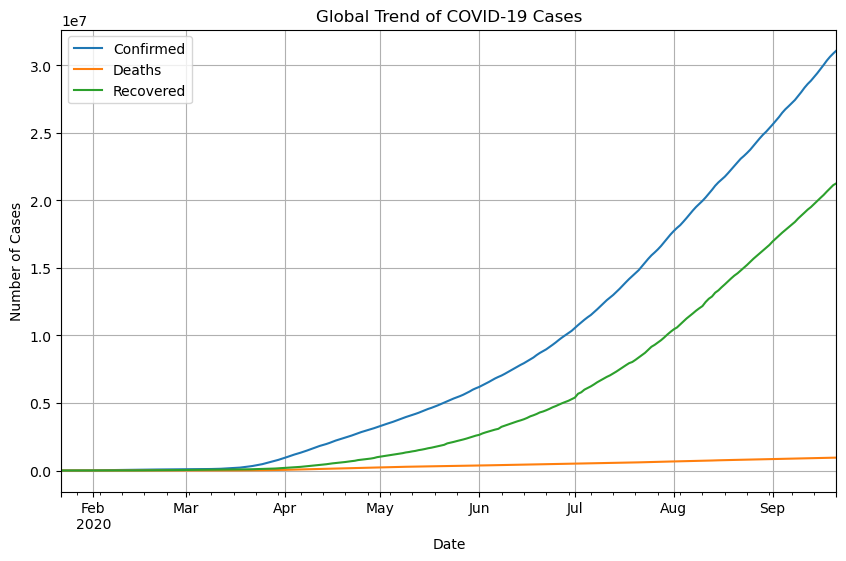

In [15]:
# Global trend of confirmed, deaths, and recovered cases
global_trend = data.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()

plt.figure(figsize=(10, 6))
global_trend.plot(ax=plt.gca())
plt.title("Global Trend of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(["Confirmed", "Deaths", "Recovered"])
plt.grid()
plt.show()

* **Confirmed Cases:** The curve for confirmed cases typically rises sharply, indicating the spread of the pandemic globally. A steeper rise suggests rapid transmission during certain periods.
* **Deaths:** The curve for deaths often lags behind confirmed cases but shows a similar growth pattern. This lag reflects the time between infection and severe outcomes.
* **Recovered Cases:** The recovered cases curve eventually grows at a pace similar to or faster than confirmed cases, indicating that many people recover over time.

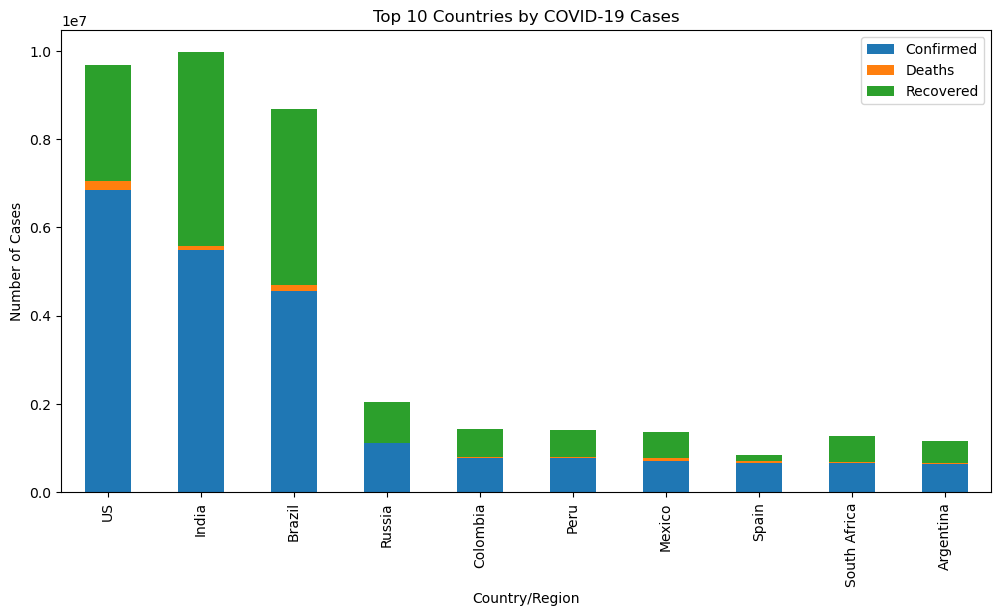

In [17]:
# Country-wise total cases
country_summary = data.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].max().sort_values("Confirmed", ascending=False)

# Visualize top 10 countries
top_countries = country_summary.head(10)
top_countries.plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Top 10 Countries by COVID-19 Cases")
plt.ylabel("Number of Cases")
plt.show()

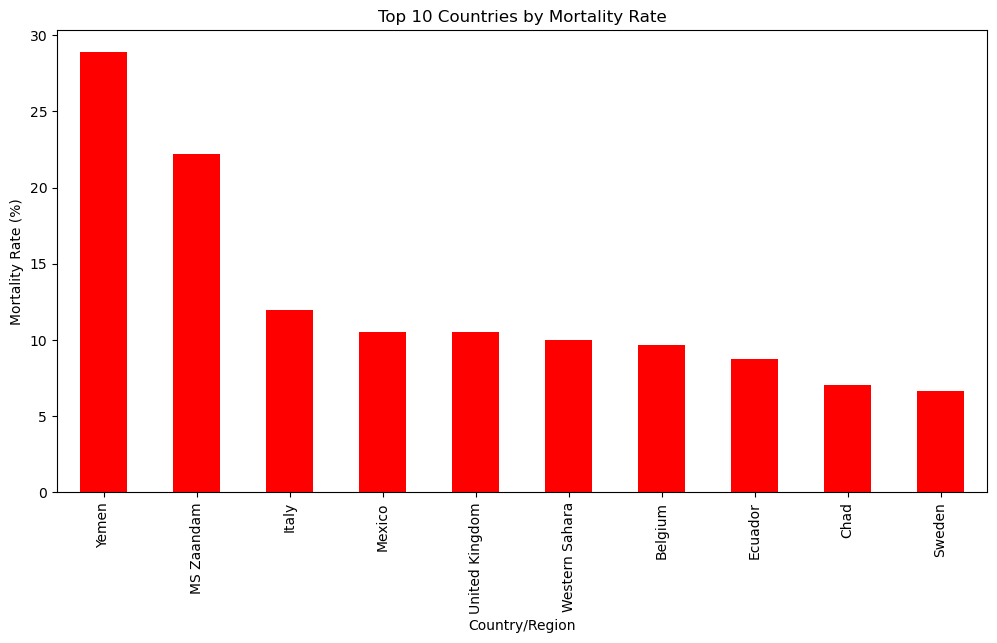

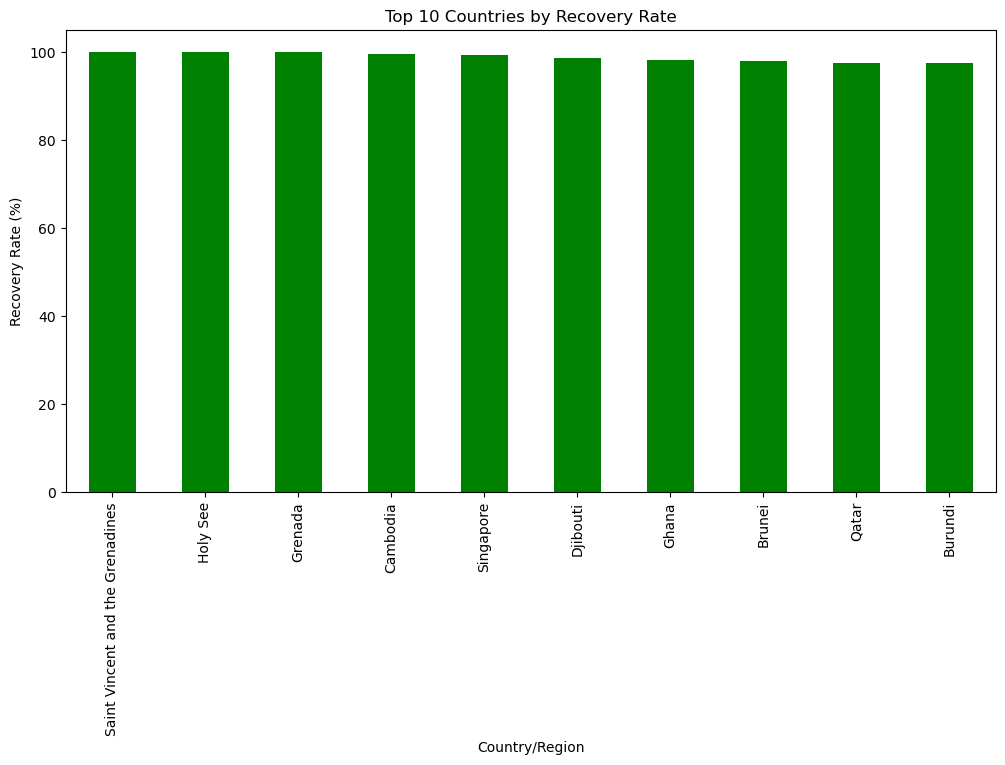

Top 10 Countries by Mortality Rate:
                 Confirmed  Deaths  Recovered  Mortality Rate (%)  \
Country/Region                                                     
Yemen                2028     586       1235           28.895464   
MS Zaandam              9       2          0           22.222222   
Italy              299506   35724     218703           11.927641   
Mexico             700580   73697     596317           10.519427   
United Kingdom     398625   41788        575           10.483035   
Western Sahara         10       1          8           10.000000   
Belgium            103392    9996      18977            9.668059   
Ecuador            126711   11095     102852            8.756146   
Chad                 1153      81        967            7.025152   
Sweden              88237    5865          0            6.646871   

                Recovery Rate (%)  
Country/Region                     
Yemen                   60.897436  
MS Zaandam               0.000000  
It

In [18]:
# Calculate rates
country_summary["Mortality Rate (%)"] = (country_summary["Deaths"] / country_summary["Confirmed"]) * 100
country_summary["Recovery Rate (%)"] = (country_summary["Recovered"] / country_summary["Confirmed"]) * 100

# Sort countries by mortality rate
top_mortality = country_summary.sort_values("Mortality Rate (%)", ascending=False).head(10)
top_recovery = country_summary.sort_values("Recovery Rate (%)", ascending=False).head(10)

# Plot top mortality rates
plt.figure(figsize=(12, 6))
top_mortality["Mortality Rate (%)"].plot(kind="bar", color="red")
plt.title("Top 10 Countries by Mortality Rate")
plt.ylabel("Mortality Rate (%)")
plt.show()

# Plot top recovery rates
plt.figure(figsize=(12, 6))
top_recovery["Recovery Rate (%)"].plot(kind="bar", color="green")
plt.title("Top 10 Countries by Recovery Rate")
plt.ylabel("Recovery Rate (%)")
plt.show()

# Print summaries
print("Top 10 Countries by Mortality Rate:\n", top_mortality)
print("Top 10 Countries by Recovery Rate:\n", top_recovery)

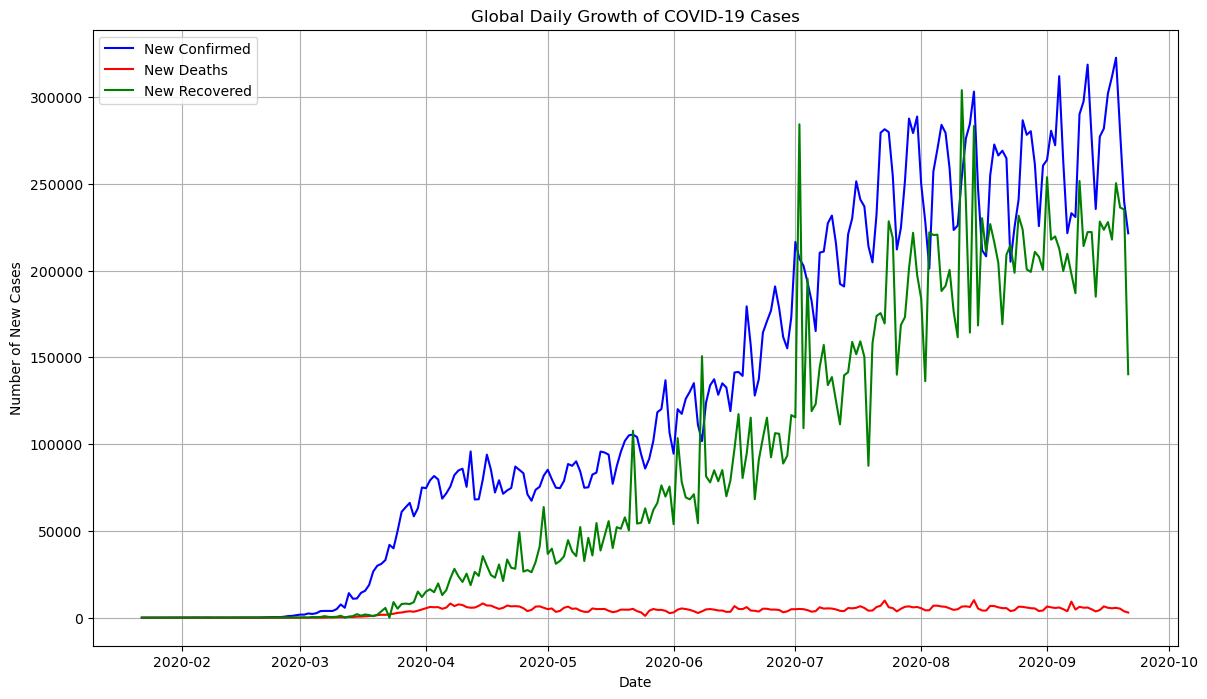

In [19]:
# Calculate daily new cases
data["New Confirmed"] = data.groupby("Country/Region")["Confirmed"].diff().fillna(0)
data["New Deaths"] = data.groupby("Country/Region")["Deaths"].diff().fillna(0)
data["New Recovered"] = data.groupby("Country/Region")["Recovered"].diff().fillna(0)

# Global daily growth
daily_growth = data.groupby("Date")[["New Confirmed", "New Deaths", "New Recovered"]].sum()

# Plot daily growth
plt.figure(figsize=(14, 8))
plt.plot(daily_growth.index, daily_growth["New Confirmed"], label="New Confirmed", color="blue")
plt.plot(daily_growth.index, daily_growth["New Deaths"], label="New Deaths", color="red")
plt.plot(daily_growth.index, daily_growth["New Recovered"], label="New Recovered", color="green")
plt.title("Global Daily Growth of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")
plt.legend()
plt.grid()
plt.show()

In [20]:
# Find peak dates
peak_confirmed = daily_growth["New Confirmed"].idxmax()
peak_deaths = daily_growth["New Deaths"].idxmax()
peak_recovered = daily_growth["New Recovered"].idxmax()

print(f"Peak Confirmed Cases: {peak_confirmed} with {daily_growth['New Confirmed'].max()} cases")
print(f"Peak Deaths: {peak_deaths} with {daily_growth['New Deaths'].max()} deaths")
print(f"Peak Recovered: {peak_recovered} with {daily_growth['New Recovered'].max()} recoveries")

Peak Confirmed Cases: 2020-09-18 00:00:00 with 322603.0 cases
Peak Deaths: 2020-08-14 00:00:00 with 10119.0 deaths
Peak Recovered: 2020-08-11 00:00:00 with 303924.0 recoveries


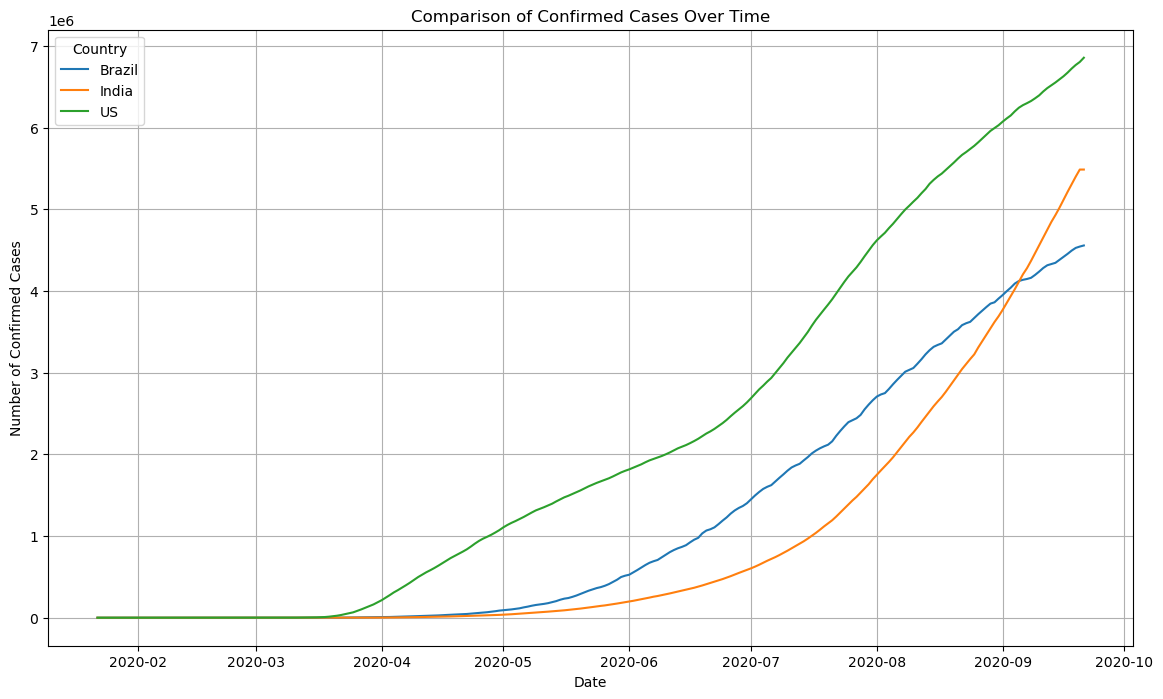

In [21]:
# Select countries for comparison
countries_to_compare = ["India", "US", "Brazil"]
comparison_data = data[data["Country/Region"].isin(countries_to_compare)]
comparison_trend = comparison_data.groupby(["Country/Region", "Date"])[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

# Plot comparison
plt.figure(figsize=(14, 8))
sns.lineplot(data=comparison_trend, x="Date", y="Confirmed", hue="Country/Region")
plt.title("Comparison of Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.legend(title="Country")
plt.grid()
plt.show()

### DATA PRE-PROCESSING

### Check for Missing Values

In [24]:
# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

# Handling missing values
# Fill missing 'Province/State' with 'Unknown' since not all countries have states
data['Province/State'] = data['Province/State'].fillna('Unknown')

# For numerical columns like 'Confirmed', 'Deaths', 'Recovered', replace missing values with 0
data[['Confirmed', 'Deaths', 'Recovered']] = data[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

Missing values in the dataset:
 Province/State    44408
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
New Confirmed         0
New Deaths            0
New Recovered         0
dtype: int64


### Convert Data Types

In [26]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Confirm data types
print("Data types after conversion:\n", data.dtypes)

Data types after conversion:
 Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
New Confirmed            float64
New Deaths               float64
New Recovered            float64
dtype: object


### Feature Engineering

In [28]:
# Create 'Active' cases column
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

# Create 'Mortality Rate (%)' and 'Recovery Rate (%)'
data['Mortality Rate (%)'] = (data['Deaths'] / data['Confirmed']) * 100
data['Recovery Rate (%)'] = (data['Recovered'] / data['Confirmed']) * 100

# Replace NaN or infinity values in rates with 0 (occurs if 'Confirmed' is 0)
data[['Mortality Rate (%)', 'Recovery Rate (%)']] = data[['Mortality Rate (%)', 'Recovery Rate (%)']].fillna(0)

### Generate Time-Based Features

In [30]:
# Add time-based features
data['Weekday'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month

print("Sample of new time-based features:\n", data[['Date', 'Weekday', 'Month']].head())

Sample of new time-based features:
         Date    Weekday  Month
0 2020-01-22  Wednesday      1
1 2020-01-22  Wednesday      1
2 2020-01-22  Wednesday      1
3 2020-01-22  Wednesday      1
4 2020-01-22  Wednesday      1


In [31]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,New Confirmed,New Deaths,New Recovered,Active,Mortality Rate (%),Recovery Rate (%),Weekday,Month
0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,Wednesday,1
1,Unknown,Albania,41.153300,20.168300,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,Wednesday,1
2,Unknown,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,Wednesday,1
3,Unknown,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,Wednesday,1
4,Unknown,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60263,Unknown,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,24428,465.0,3.0,728.0,11458,0.733036,67.572128,Monday,9
60264,Unknown,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,8,0.0,0.0,0.0,1,10.000000,80.000000,Monday,9
60265,Unknown,Yemen,15.552727,48.516388,2020-09-21,2028,586,1235,2.0,0.0,8.0,207,28.895464,60.897436,Monday,9
60266,Unknown,Zambia,-13.133897,27.849332,2020-09-21,14175,331,13629,44.0,1.0,264.0,215,2.335097,96.148148,Monday,9


### Handle Categorical Data

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder_country = LabelEncoder()
label_encoder_province = LabelEncoder()
label_encoder_weekday = LabelEncoder()

data["Country/Region_Encoded"] = label_encoder_country.fit_transform(data["Country/Region"])
data["Province/State_Encoded"] = label_encoder_province.fit_transform(data["Province/State"])
data["Weekday_encoded"] = label_encoder_weekday.fit_transform(data["Weekday"])

# Drop original categorical columns
data.drop(["Province/State", "Country/Region","Weekday"], axis=1, inplace=True)

In [34]:
data

,Lat,Long,Date,Confirmed,Deaths,Recovered,New Confirmed,New Deaths,New Recovered,Active,Mortality Rate (%),Recovery Rate (%),Month,Country/Region_Encoded,Province/State_Encoded,Weekday_encoded
0,33.939110,67.709953,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,1,0,60,6
1,41.153300,20.168300,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,1,1,60,6
2,28.033900,1.659600,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,1,2,60,6
3,42.506300,1.521800,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,1,3,60,6
4,-11.202700,17.873900,2020-01-22,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,1,4,60,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60263,31.952200,35.233200,2020-09-21,36151,265,24428,465.0,3.0,728.0,11458,0.733036,67.572128,9,179,60,1
60264,24.215500,-12.885800,2020-09-21,10,1,8,0.0,0.0,0.0,1,10.000000,80.000000,9,180,60,1
60265,15.552727,48.516388,2020-09-21,2028,586,1235,2.0,0.0,8.0,207,28.895464,60.897436,9,181,60,1
60266,-13.133897,27.849332,2020-09-21,14175,331,13629,44.0,1.0,264.0,215,2.335097,96.148148,9,182,60,1


### Normalize Numerical Columns 

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Normalized dataset sample:\n", data[numerical_cols].head())

Normalized dataset sample:
    Confirmed  Deaths  Recovered    Active
0        0.0     0.0        0.0  0.000005
1        0.0     0.0        0.0  0.000005
2        0.0     0.0        0.0  0.000005
3        0.0     0.0        0.0  0.000005
4        0.0     0.0        0.0  0.000005


# BALANCING

In time series forecasting (like COVID-19 case predictions), balancing is not a primary concern because:

* The dataset consists of continuous numerical values (confirmed cases, deaths, recoveries) rather than categorical class labels.
* Time series data follows a natural trend over time, and altering its distribution could distort predictions.
* Forecasting models do not require balancing as they rely on sequential dependencies, not class distributions.


## MODEL BUILDING

In [1]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data[numerical_cols].drop(columns=["Date", "Confirmed"])
y = data[numerical_cols]["Confirmed"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape


NameError: name 'df_scaled' is not defined